<a href="https://colab.research.google.com/github/AndrewstheBuilder/machine_translation_French-Wolof/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Definition of RNN from Karpathy:
RNN Forward Pass Template(This is the paradigm for most of them probably. I have already seen two implementations following this paradigm):
```python
class RNN:
  # ...
  def step(self, x):
    # update the hidden state
    self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x)) # self.h is the hidden state, x is the input.
    # those weight matrices W_hh and W_xh are solely used for the hidden state and input respectively
    # compute the output vector
    y = np.dot(self.W_hy, self.h) # self.W_hy is solely used for the hidden state
    return y
```

Why is this addition used with the hidden state and the current input. How can I think about it conceptually? I think it makes sense on a abstract level. The previous sequence is influencing the current input. Also the third *np.dot(self.W_hy, self.h)*. Why do we do that third step?

In [ ]:
# RNN Implementation from Grokking Learning
import sys

f = open('grokking_rnn/reviews.txt')
raw_reviews = f.readlines()
f.close()

f = open('grokking_rnn/labels.txt')
raw_labels = f.readlines()
f.close()

tokens = list(map(lambda x:set(x.split(" ")),raw_reviews))

vocab = set()
for sent in tokens:
    for word in sent:
        if(len(word)>0):
            vocab.add(word)
vocab = list(vocab)

word2index = {}
for i,word in enumerate(vocab):
    word2index[word]=i

input_dataset = list()
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
        except:
            ""
    input_dataset.append(list(set(sent_indices))) # Meaning you do not include duplicate words in your input dataset.
    # And the ordering of words do not matter in the input dataset.
    # Just the content of words and they are only accounted for a single occurrence.
target_dataset = list()
for label in raw_labels:
    if label == 'positive\n':
        target_dataset.append(1)
    else:
        target_dataset.append(0)

In [ ]:
raw_reviews[:1]
# raw_labels[:2]

In [ ]:
tokens[:1]

In [ ]:
input_dataset[:1]

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
import sys,random,math
from collections import Counter
import numpy as np
import seaborn as sns

np.random.seed(1)
random.seed(1)
f = open('grokking_rnn/reviews.txt')
raw_reviews = f.readlines()
f.close()

tokens = list(map(lambda x:(x.split(" ")),raw_reviews))
wordcnt = Counter()
for sent in tokens:
    for word in sent:
        wordcnt[word] -= 1
vocab = list(set(map(lambda x:x[0],wordcnt.most_common())))
# It puts the least common words up in the beginning of the vocab
# Why is that?

word2index = {}
for i,word in enumerate(vocab):
    word2index[word]=i

concatenated = list()
input_dataset = list()
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
            concatenated.append(word2index[word])
        except:
            ""
    input_dataset.append(sent_indices)
concatenated = np.array(concatenated) # contenated is used later for????
# Its the same as input_dataset except that it does not get shuffled like below
random.shuffle(input_dataset)

In [ ]:
alpha, iterations = (0.05, 2)
hidden_size,window,negative = (50,2,5)

weights_0_1 = (np.random.rand(len(vocab),hidden_size) - 0.5) * 0.2
weights_1_2 = np.random.rand(len(vocab),hidden_size)*0

layer_2_target = np.zeros(negative+1)
layer_2_target[0] = 1

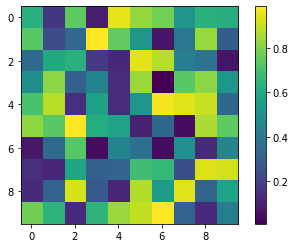

In [ ]:
# Find a good way to display the distribution of weights
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = np.random.rand(10, 10)
# print(data.shape)
# print(weights_0_1.shape)
# print(weights_0_1[:10].shape)
# print(data)
# print(weights_0_1[:10])

# Create heatmap using matplotlib
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

### Write a neural network to predict whether the sentiment of the review is positive or negative

In [3]:
# Preprocessing Step for IMBD data
import sys

f = open('reviews.txt')
raw_reviews = f.readlines()
f.close()

f = open('labels.txt')
raw_labels = f.readlines()
f.close()

tokens = list(map(lambda x:set(x.split(" ")), raw_reviews))

vocab = set()
for sent in tokens:
    for word in sent:
        if(len(word)>0):
            vocab.add(word)
vocab = list(vocab)

word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i

input_dataset = list()
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
        except:
            ""
    input_dataset.append(list(set(sent_indices)))

target_dataset = list()
for label in raw_labels:
    if label == 'positive\n':
        target_dataset.append(1)
    else:
        target_dataset.append(0)

In [ ]:
# Actual Neural Network
# My implementation
# Stopped at forward propagation because there is a exp overflow issue
import numpy as np
np.random.seed(1)

# Define a activation function --> Relu and Relu2Deriv
relu = lambda x: (x>0) * x
relu2deriv = lambda x: x>0

# Output activation function to get a value between 0 and 1
def sigmoid(x):
    return 1/(1+np.exp(-x))

alpha, iterations = (0.01, 2)
hidden_size = 100

weights_0_1 = 0.2*np.random.random((len(vocab), hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size, 1)) - 0.1
# Notes on weights_1_2
# the network will output one answer if its closer to a zero then its 'negative'
# And if its closer to 1 then its positive. The threshold is 0.5 and up is 'positive'.

# Could adding a bias get rid of the need for scaling the weights above??
bias_0_1 = 0.2*np.random.random((hidden_size)) - 0.1
bias_1_2 = 0.2*np.random.random((1,1)) - 0.1

for j in range(iterations):
    error, correct_cnt =(0.0, 0)

    for i in range(len(input_dataset[:10])):
        row  = input_dataset[i]
        label_number = target_dataset[i]
        padded_row = list()
        if(len(row) < len(vocab)):
            # pad input with -1s
            padded_row += row + [-1] * (len(vocab) - len(row))
        elif(len(row) == len(vocab)):
            # the row does not need any padding
            padded_row += row
        else:
            raise Exception('Length of row exceeded length of vocab which should not be possible.')
        layer_0 = padded_row
        layer_1 = np.dot(layer_0,weights_0_1) #+ bias_0_1
#         print('before:',layer_1.shape)
#         print('bias_0_1.shape',bias_0_1.shape)
#         layer_1 += bias_0_1
#         print('after:',layer_1.shape)
        layer_1 = relu(layer_1)
        layer_2 = np.dot(layer_1, weights_1_2) #+ bias_1_2
        layer_2 = sigmoid(layer_2)
        error += np.sum((layer_2-label_number)**2) # Mean Squared Error
#         print('layer_2',layer_2)

<ipython-input-79-7d51902177a9>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [1]:
from google.colab import files

uploaded = files.upload()

Saving labels.txt to labels.txt
Saving reviews.txt to reviews.txt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Grokking Deep Learning Implementation
import numpy as np
np.random.seed(1)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

alpha, iterations = (0.01, 2)
hidden_size = 100

weights_0_1 = 0.2*np.random.random((len(vocab), hidden_size)) - 0.1 # This will contain the trained word embeddings!!!!
weights_1_2 = 0.2*np.random.random((hidden_size,1)) - 0.1

correct, total = (0,0)
for iter in range(iterations):

    for i in range(len(input_dataset)-1000): # trains on first 24,000 reviews

        x,y = (input_dataset[i],target_dataset[i])
        layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0)) # embed + sigmoid. Why sigmoid here?...
        # TODO: come back to sum and relearn the significance of the axis
        layer_2 = sigmoid(np.dot(layer_1, weights_1_2))

        layer_2_delta = layer_2 - y # raw error. Compares the prediction with the truth
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) # Backpropagation

        weights_0_1[x] -= layer_1_delta * alpha
        weights_1_2 -= np.outer(layer_1,layer_2_delta) * alpha

        if(np.abs(layer_2_delta) < 0.5):
            # How is it being less than 0.5 mean that the prediction is correct??
            # Why is the threshold 0.5? Is it a heuristic?
            correct += 1
        total += 1
        if(i % 10 == 9):
            progress = str(i/float(len(input_dataset)))
            sys.stdout.write('\rIter:' + str(iter)\
                                + ' Progress:'+progress[2:4]\
                                + '.'+progress[4:6]\
                                +'% Training Accuracy:'\
                                +str(correct/float(total)) + '%')
    print()
# this is the test data set portion of the code
correct, total = (0,0)
for i in range(len(input_dataset) - 1000,len(input_dataset)):

    x = input_dataset[i]
    y = target_dataset[i]

    layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0))
    layer_2 = sigmoid(np.dot(layer_1, weights_1_2))

    if(np.abs(layer_2 - y) < 0.5):
        correct += 1
    total += 1
print("Test accuracy:" + str(correct/float(total)))

Iter:0 Progress:95.99% Training Accuracy:0.8335%
Iter:1 Progress:95.99% Training Accuracy:0.8667916666666666%
Test accuracy:0.85


Filling in the blank

In [4]:
import sys,random,math
from collections import Counter
import numpy as np

np.random.seed(1)
random.seed(1)
f = open('reviews.txt')
raw_reviews = f.readlines()
f.close()

tokens = list(map(lambda x:(x.split(" ")),raw_reviews))
wordcnt = Counter()
for sent in tokens:
    for word in sent:
        wordcnt[word] -= 1
vocab = list(set(map(lambda x:x[0],wordcnt.most_common()))) # this puts the least common words in first
# And its a set of words so there are no duplicate words added to the set. Set python DataStructure(DS)

word2index = {}
for i,word in enumerate(vocab):
    word2index[word]=i

concatenated = list()
input_dataset = list()
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
            concatenated.append(word2index[word])
        except:
            ""
    input_dataset.append(sent_indices)
concatenated = np.array(concatenated)
random.shuffle(input_dataset)

In [5]:
alpha, iterations = (0.05, 2)
hidden_size,window,negative = (50,2,5)

weights_0_1 = (np.random.rand(len(vocab),hidden_size) - 0.5) * 0.2
weights_1_2 = np.random.rand(len(vocab),hidden_size)*0 # The weights from layers 1 - 2 are all 0s.

# What are these two for?
layer_2_target = np.zeros(negative+1)
layer_2_target[0] = 1

# Find similarity between words using the embedding weight and euclidean distance formula
def similar(target='beautiful'):
  target_index = word2index[target]

  scores = Counter()
  for word,index in word2index.items():
    raw_difference = weights_0_1[index] - (weights_0_1[target_index])
    squared_difference = raw_difference * raw_difference
    scores[word] = -math.sqrt(sum(squared_difference))
  return scores.most_common(10)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

for rev_i,review in enumerate(input_dataset * iterations):
  for target_i in range(len(review)):
    # since it's really expensive to predict every vocabulary
    # we're only going to predict a random subset
    # TODO understand what this target_samples is...
    target_samples = [review[target_i]]+list(concatenated\
    [(np.random.rand(negative)*len(concatenated)).astype('int').tolist()])

    # TODO: understand how we use left and right context
    # Left context is a window of words before the target
    # Right context is a window of words after the target.
    # The max and min functions are used to avoid out of bounds exceptions
    # left and right contexts are lists
    left_context = review[max(0,target_i-window):target_i]
    right_context = review[target_i+1:min(len(review),target_i+window)]

    # Why do we take the mean of weights_0_1 after getting the embeddings for the left context and
    # right context?
    # I think this can be explained by the word2vec negative sampling paper
    layer_1 = np.mean(weights_0_1[left_context+right_context],axis=0)
    layer_2 = sigmoid(layer_1.dot(weights_1_2[target_samples].T))
    # Why do we take the target_samples and put it in weights_1_2??
    # I think I do not understand weights_1_2
    layer_2_delta = layer_2 - layer_2_target
    layer_1_delta = layer_2_delta.dot(weights_1_2[target_samples])

    weights_0_1[left_context+right_context] -= layer_1_delta * alpha
    weights_1_2[target_samples] -= np.outer(layer_2_delta,layer_1)*alpha

  if(rev_i % 250 == 0):
    sys.stdout.write('\rProgress:'+str(rev_i/float(len(input_dataset)*iterations)) + "   " + str(similar('terrible')))
  # sys.stdout.write('\rProgress:'+str(rev_i/float(len(input_dataset)*iterations)))
print(similar('terrible'))

Progress:0.995   [('terrible', -0.0), ('horrible', -2.8963534948408167), ('brilliant', -3.2749682491032743), ('superb', -3.642812441762594), ('masterful', -3.8567984723266195), ('pathetic', -3.9437086086620288), ('phenomenal', -3.9550606757583435), ('mediocre', -3.99889190710459), ('terrific', -4.020567790576277), ('marvelous', -4.067778549675154)][('terrible', -0.0), ('horrible', -2.862399202677226), ('brilliant', -3.4766190052069876), ('superb', -3.855859491879266), ('pathetic', -3.8840480659475594), ('masterful', -3.949050018509411), ('bad', -3.9642279263941615), ('mediocre', -4.017503600687672), ('phenomenal', -4.0372739416674746), ('marvelous', -4.097234687262077)]


In [8]:
print(similar('movie'))

[('movie', -0.0), ('film', -3.8947651212371484), ('documentary', -4.7505790862901005), ('program', -4.805620089328229), ('project', -5.230649447411363), ('show', -5.237190652793311), ('game', -5.311411939473912), ('programme', -5.3844935178311815), ('miniseries', -5.396019546443762), ('contestant', -5.418593183157244)]
